## Look at the big picture
1. Aims: Classify any new diamond in the three categories (Low, Mid and High grade).
2. Performance measure: confusion matrix



## Get the data

### Import the packages and the data

In [366]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
# Read the CSV file
df = pd.read_csv(
    '/Users/sean/OneDrive - connect.hku.hk/ECOM7126/Assignment/DiamondDataSet.csv')

# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "assignment2"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Take a Quick Look at the Data Structure

In [367]:
# get a glance of the data
df.head()


,carat,cut,colour,clarity,Length,Width,height,depth ratio,table,Grading
0,1.20,Very Good,H,SI2,6.74,6.77,4.25,62.9,56.0,Mid
1,0.60,Ideal,G,VVS2,5.37,5.41,3.31,61.4,59.0,Mid
2,0.23,Ideal,G,IF,3.93,3.96,2.48,62.8,55.0,Low
3,1.51,Very Good,D,VS2,7.29,7.34,4.56,62.3,59.0,High
4,1.01,Very Good,D,VVS2,6.51,6.57,3.94,60.2,58.0,High


In [368]:
# get the info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        10000 non-null  float64
 1   cut          10000 non-null  object 
 2   colour       10000 non-null  object 
 3   clarity      10000 non-null  object 
 4   Length       10000 non-null  float64
 5   Width        10000 non-null  float64
 6   height       10000 non-null  float64
 7   depth ratio  10000 non-null  float64
 8   table        10000 non-null  float64
 9   Grading      10000 non-null  object 
dtypes: float64(6), object(4)
memory usage: 781.4+ KB


In [369]:
df.describe()


,carat,Length,Width,height,depth ratio,table
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.801591,5.738197,5.744263,3.545418,61.758790,57.453700
std,0.477550,1.131100,1.239754,0.753577,1.442807,2.243387
min,0.200000,0.000000,0.000000,0.000000,50.800000,49.000000
25%,0.400000,4.720000,4.720000,2.910000,61.100000,56.000000
50%,0.700000,5.690000,5.710000,3.530000,61.900000,57.000000
75%,1.050000,6.550000,6.550000,4.040000,62.500000,59.000000
max,4.130000,10.140000,58.900000,31.800000,71.800000,95.000000


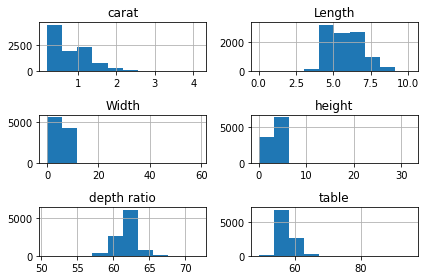

In [370]:
df.hist()
save_fig("hist")  # extra code


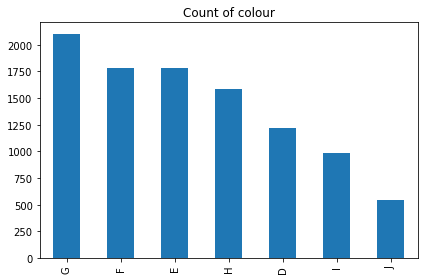

In [371]:
df["colour"].value_counts().plot(kind='bar')
plt.title('Count of colour')
save_fig("Count of colour")  # extra code


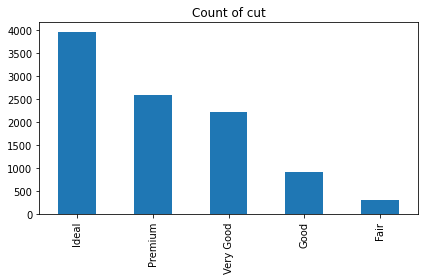

In [372]:
df["cut"].value_counts().plot(kind='bar')
plt.title('Count of cut')
save_fig("Count of cut")  # extra code


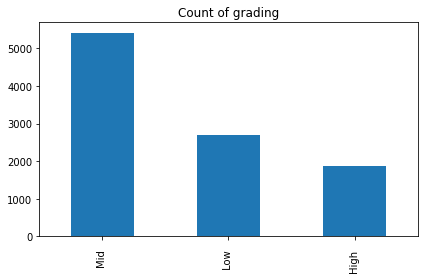

In [373]:
df["Grading"].value_counts().plot(kind='bar')
plt.title('Count of grading')
save_fig("Count of grading")  # extra code


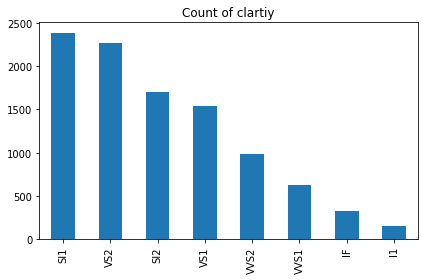

In [374]:
df["clarity"].value_counts().plot(kind='bar')
plt.title('Count of clartiy')
save_fig("Count of clartiy")  # extra code


### Create Test set

In [375]:
# Random sampling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


## Discover and Visualize the Data

In [376]:
# get a train set copy
train_set_copy = train_set.copy()


### Look for correlations

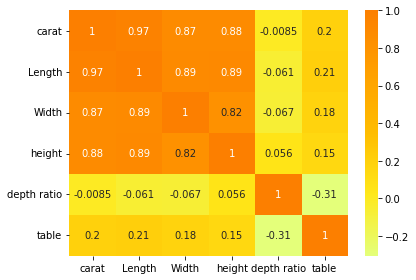

In [377]:

corr_matrix = train_set_copy.corr()
sns.heatmap(corr_matrix, cmap='Wistia', annot=True)
save_fig("corr_matrix")  # extra code


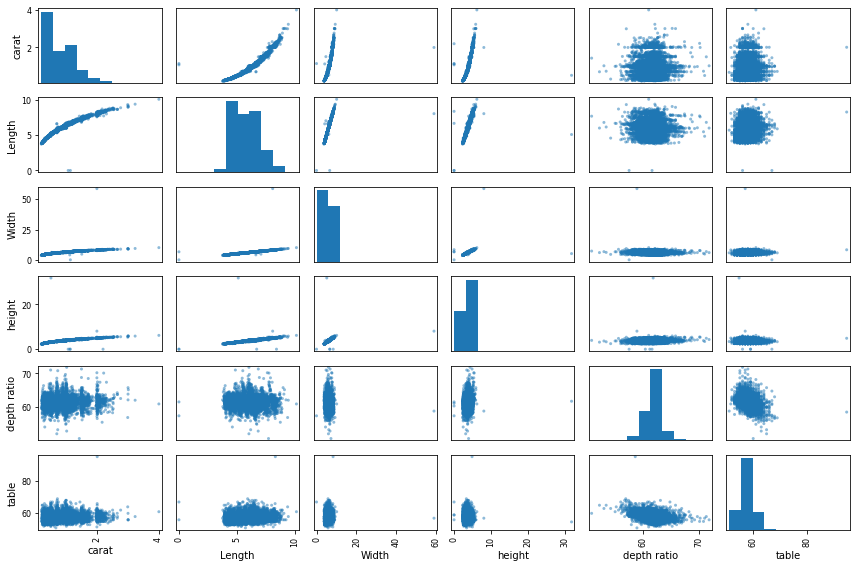

In [378]:
from pandas.plotting import scatter_matrix
attributes = ["carat", "Length", "Width",
              "height", "depth ratio", "table"]
scatter_matrix(train_set_copy[attributes], figsize=(12, 8))
save_fig("attributes")  # extra code
plt.show()


## Prepare the data for ML algotithms


In [379]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

# get the label and the features
y_train = train_set['Grading']
X_train = train_set.drop("Grading", axis=1)
y_test = test_set["Grading"]
X_test = test_set.drop("Grading", axis=1)


## Select different classifiers


In [380]:
# use SVM as classifier
from sklearn.svm import SVC
svm_clf = make_pipeline(preprocessing, SVC(random_state=42))
svm_clf.fit(X_train, y_train)
svm_predict = svm_clf.predict(X_test)


In [381]:
# use KNN as classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = make_pipeline(preprocessing, KNeighborsClassifier())
knn_clf.fit(X_train, y_train)
knn_predict = knn_clf.predict(X_test)


In [382]:
# use decision tree as classifirer
from sklearn.tree import DecisionTreeClassifier
dt_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))
dt_clf.fit(X_train, y_train)
dt_predict = dt_clf.predict(X_test)


In [383]:
# use random forest as classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))
rf_clf.fit(X_train, y_train)
rf_predict = rf_clf.predict(X_test)


In [384]:
# use logistic regression as classifier
from sklearn.linear_model import LogisticRegression
lr_clf = make_pipeline(preprocessing, LogisticRegression(random_state=42))
lr_clf.fit(X_train, y_train)
lr_predict = lr_clf.predict(X_test)


/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [385]:
# use naive bayes as classifier
from sklearn.naive_bayes import GaussianNB
nb_clf = make_pipeline(preprocessing, GaussianNB())
nb_clf.fit(X_train, y_train)
nb_predict = nb_clf.predict(X_test)


In [386]:
# use gradient boosting as classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = make_pipeline(
    preprocessing, GradientBoostingClassifier(random_state=42))
gb_clf.fit(X_train, y_train)
gb_predict = gb_clf.predict(X_test)


In [387]:
# use ann as classifier
from sklearn.neural_network import MLPClassifier
ann_clf = make_pipeline(preprocessing, MLPClassifier(random_state=42))
ann_clf.fit(X_train, y_train)
ann_predict = ann_clf.predict(X_test)


/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [388]:
# use RNN as classifier
from sklearn.neural_network import MLPClassifier
rnn_clf = make_pipeline(preprocessing, MLPClassifier(random_state=42))
rnn_clf.fit(X_train, y_train)
rnn_predict = rnn_clf.predict(X_test)


/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Performance Measures

### Measuring Accuracy, precision, recall and f1 and confusion matrix

In [389]:
# define a function to calculate the accuracy, precision, recall, f1 score and confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


def performance_measures(y_test, y_pred, model_name):
    accuracy_model = accuracy_score(y_test, y_pred)
    precision_model = precision_score(y_test, y_pred, average='weighted')
    recall_model = recall_score(y_test, y_pred, average='weighted')
    f1_model = f1_score(y_test, y_pred, average='weighted')
    confusion_mat_model = confusion_matrix(y_test, y_pred)
    print(f'Model name:{model_name}')
    print(f'Accuracy: {accuracy_model}')
    print(f'Precision: {precision_model}')
    print(f'Recall: {recall_model}')
    print(f'F1 score: {f1_model}')
    print(f'Confusion matrix: \n{confusion_mat_model}')

    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, normalize="true", values_format=".0%")
    save_fig(f"ConfusionMatrix_{model_name}")  # extra code
    plt.title(f"Confusion Matrix Display for {model_name}")
    plt.show()


Model name:SVM
Accuracy: 0.944
Precision: 0.944315441179156
Recall: 0.944
F1 score: 0.9440315431083787
Confusion matrix: 
[[ 529    0   22]
 [   0  339   23]
 [  40   27 1020]]


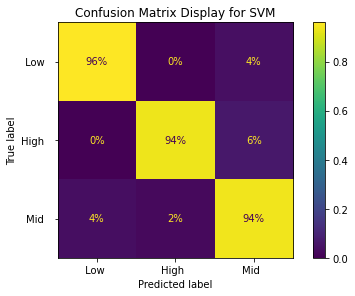

In [390]:
performance_measures(y_test, svm_predict, 'SVM')


Model name:decision tree
Accuracy: 0.944
Precision: 0.944315441179156
Recall: 0.944
F1 score: 0.9440315431083787
Confusion matrix: 
[[ 529    0   22]
 [   0  339   23]
 [  40   27 1020]]


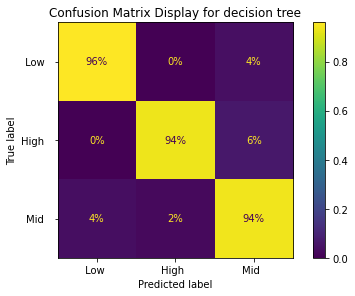

In [391]:
performance_measures(y_test, svm_predict, 'decision tree')


Model name:KNN
Accuracy: 0.8975
Precision: 0.8978968778385236
Recall: 0.8975
F1 score: 0.8973955212451931
Confusion matrix: 
[[505   0  46]
 [  0 307  55]
 [ 72  32 983]]


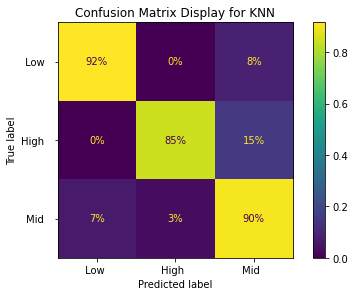

In [392]:
performance_measures(y_test, knn_predict, 'KNN')


Model name:random forest
Accuracy: 0.8975
Precision: 0.8978968778385236
Recall: 0.8975
F1 score: 0.8973955212451931
Confusion matrix: 
[[505   0  46]
 [  0 307  55]
 [ 72  32 983]]


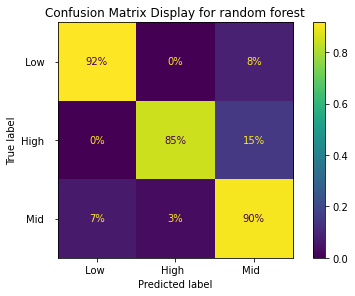

In [393]:
performance_measures(y_test, knn_predict, 'random forest')


Model name:logistic regression
Accuracy: 0.944
Precision: 0.9439993939393939
Recall: 0.944
F1 score: 0.943999160011275
Confusion matrix: 
[[ 516    0   35]
 [   0  341   21]
 [  34   22 1031]]


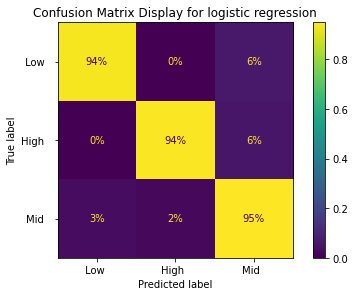

In [394]:
performance_measures(y_test, lr_predict, 'logistic regression')


Model name:naive bayes
Accuracy: 0.8385
Precision: 0.846777451851237
Recall: 0.8385
F1 score: 0.8386923810165993
Confusion matrix: 
[[534   0  17]
 [  0 286  76]
 [100 130 857]]


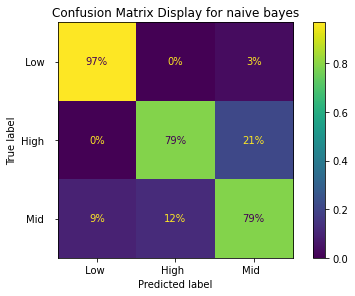

In [395]:
performance_measures(y_test, nb_predict, 'naive bayes')


Model name:gradient boosting
Accuracy: 0.9435
Precision: 0.9436747294196719
Recall: 0.9435
F1 score: 0.9435340560628488
Confusion matrix: 
[[ 524    0   27]
 [   0  340   22]
 [  36   28 1023]]


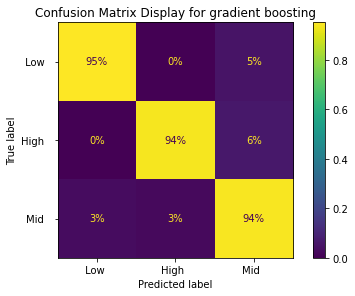

In [396]:
performance_measures(y_test, gb_predict, 'gradient boosting')


Model name:ANN
Accuracy: 0.9515
Precision: 0.9516651166639243
Recall: 0.9515
F1 score: 0.9515282046213518
Confusion matrix: 
[[ 525    0   26]
 [   0  347   15]
 [  34   22 1031]]


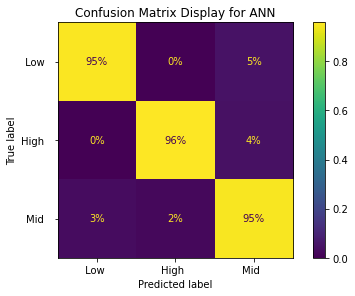

In [397]:
performance_measures(y_test, ann_predict, 'ANN')


Model name:RNN
Accuracy: 0.9515
Precision: 0.9516651166639243
Recall: 0.9515
F1 score: 0.9515282046213518
Confusion matrix: 
[[ 525    0   26]
 [   0  347   15]
 [  34   22 1031]]


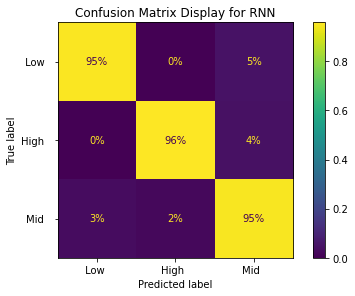

In [398]:
performance_measures(y_test, rnn_predict, 'RNN')


#### Comparison of accuracies

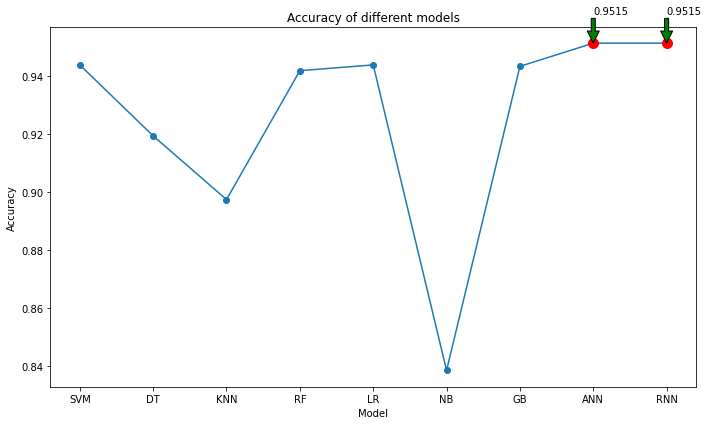

In [399]:
# plot accuracy of different models
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, svm_predict)
accuracy_dt = accuracy_score(y_test, dt_predict)
accuracy_knn = accuracy_score(y_test, knn_predict)
accuracy_rf = accuracy_score(y_test, rf_predict)
accuracy_lr = accuracy_score(y_test, lr_predict)
accuracy_nb = accuracy_score(y_test, nb_predict)
accuracy_gb = accuracy_score(y_test, gb_predict)
accuracy_ann = accuracy_score(y_test, ann_predict)
accuracy_rnn = accuracy_score(y_test, rnn_predict)
plt.figure(figsize=(10, 6))
plt.plot(['SVM', 'DT', 'KNN', 'RF', 'LR', 'NB', 'GB', 'ANN', 'RNN'], [accuracy_svm, accuracy_dt,
         accuracy_knn, accuracy_rf, accuracy_lr, accuracy_nb, accuracy_gb, accuracy_ann, accuracy_rnn], 'o-')
accuracy_dict = {'SVM': accuracy_svm, 'DT': accuracy_dt, 'KNN': accuracy_knn, 'RF': accuracy_rf,
                 'LR': accuracy_lr, 'NB': accuracy_nb, 'GB': accuracy_gb, 'ANN': accuracy_ann, 'RNN': accuracy_rnn}
# find the model with the highest accuracy
max_accuracy = max(accuracy_dict.values())
max_accuracy_model = [k for k, v in accuracy_dict.items() if v == max_accuracy]
# plot the biggest accuracy in the same figure
plt.plot([max_accuracy_model[0]], [max_accuracy],
         'o', color='red', markersize=10)
plt.plot([max_accuracy_model[1]], [max_accuracy],
         'o', color='red', markersize=10)
# use red thin arrow to point out the biggest accuracy
plt.annotate(max_accuracy, xy=(max_accuracy_model[0], max_accuracy), xytext=(max_accuracy_model[0], max_accuracy+0.01),
             arrowprops=dict(facecolor='green', shrink=0.005))
plt.annotate(max_accuracy, xy=(max_accuracy_model[1], max_accuracy), xytext=(max_accuracy_model[1], max_accuracy+0.01),
             arrowprops=dict(facecolor='green', shrink=0.005))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')

save_fig('Accuracy of different models')
plt.show()
